# 기본 준비

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
tf.__version__

TensorFlow 1.x selected.


'1.15.2'

In [ ]:
# GPU 지원 여부, 목록 확인
from tensorflow.python.client import device_lib

device_lib.list_local_devices()
# GPU록 학습 수행시 구분하는 이름
# "/device:GPU:0" 

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 446041377798989688, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8052161569739633983
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1840583586944599511
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11338832282
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 10188154968068197411
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]



```
[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2128593156629963894, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 4844831399853826807
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 2503339331685811952
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11338832282
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14882188570673188857
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]
```



# 연구 목표 수립

- 최종 산출물 기준 작성
- 데이터 MNIST 를 이용하여서, 0~9까지 손글시 숫자 이미지를 인식하는 딥러닝 기반 모델을 구축
- 이를 이용하여서 손글씨를 인식하는 웹서비스 구현
  - 손글씨 이미지를 업로드하면 그 이미지를 분류하여서(인식하여서) 결과를 돌려준다
- 딥러닝 모델은 기본 CNN을 이용 

# 데이터 수집/확보

- 데이터를 제공받아서 사용하겟다

In [ ]:
# 데이터 획득
mnist = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
type( mnist ), len( mnist )

(tuple, 2)

In [ ]:
# 훈련용, 테스트용 데이터 분리
mnist_train, mnist_test = mnist

In [ ]:
mnist_train[0].shape, mnist_train[1].shape
# 데이터는 6만개, 데이터 1개는 28,28 
# 정답은 6만개

((60000, 28, 28), (60000,))

In [ ]:
mnist_train[1]
# 정답은 0~9사이 값으로 표현

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
mnist_train[0][0]
# 이미지 가로 한줄이 28픽셀, 
# 총 28개가 준비되어서 
# 이미지는 (28, 28)
# 픽셀값이 0~255로 표현되어 있다
# 딥러닝을 위해서는 데이터가 모두 수치이여야 한다 
# 간단하게 정규화 해서 사용

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
# 데이터를 분리 
X_train, y_train = mnist_train
X_test,  y_test  = mnist_test

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_train[0]/255

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## 이미 정규화 처리가 된 데이터 활용

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data

In [ ]:
# 실제적으로 데이터는 이 방식으로 획득
# 데이터가 객체형으로 제공, 정규화처리도 되어 있고
mnist = input_data.read_data_sets( './data/mnist/' )

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [ ]:
# 이미지 데이터 55000개, 이미지 1개에 대해서 784 feature 제공(28*28)
mnist.train.images.shape

(55000, 784)

In [ ]:
# 정규화 처리가 이미 되어 있다
mnist.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
# 훈련용 데이터
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000,))

In [ ]:
# 테스트용 데이터
mnist.test.images.shape, mnist.test.labels.shape

((10000, 784), (10000,))

In [ ]:
mnist.train.labels
# 학습 효율을 높이는 방법
# 수치를 0~1사이에 표현
# 범주형 변수들 => 0과 1로 표현하는 방식이 좀더 효율적이다
# 범부형 변수를 0과 1로 표현하는 방식 원-핫 인코딩(one-hot 인코딩)

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# 원-핫 인코딩을 바로 처리하면서 데이터 로드
# 클레스형 제공(간편), 정규화 처리, 원-핫 인코딩 처리까지 반영된 데이터
# 데이터 전처리를 수행하여 받아왔다
mnist = input_data.read_data_sets( './data/mnist/', one_hot=True )

Extracting ./data/mnist/train-images-idx3-ubyte.gz
Extracting ./data/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz


In [ ]:
# 데이터가 좀더 늘어나더라도 학습 성과가 더 좋은쪽으로 데이터를 가공
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

# 데이터 준비(생략)

- 데이터의 품질을 높이는 과정 진행
- 전처리, 정제, 파생변수, 압축, 군집,....

# 데이터 분석(생략)

# 모델 구축

- 텐서플로우 1.x 사용

## Part1

### 환경변수 설정 및 초기화

- 딥러닝 수행에 필요한 상수값 정의
- 실험 환경을 통제할수 있는 값 정의

In [ ]:
# 훈련용 데이터 shape
# 데이터는 55000, 특성(feature)은 784, 정답(label)은 10개(one-hot처리)
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000, 10))

In [ ]:
# 테스트용 데이터 shape
# 데이터는 10000, 특성(feature)은 784, 정답(label)은 10개(one-hot처리)
mnist.test.images.shape, mnist.test.labels.shape

((10000, 784), (10000, 10))

In [ ]:
# 이미지 데이터 대한 상수를 정의 
# 이미지 1개가 가지는 총 픽셀량( 총 featur 수 )
PIXEL = mnist.train.images.shape[1]
PIXEL

784

In [ ]:
# 이미지의 세로, 가로 크기 -> 정사각형(사전에 미리 알고 있었다)
import numpy as np
PIXEL_H = int( np.sqrt(PIXEL) )
PIXEL_W = PIXEL_H

PIXEL_H, PIXEL_W

(28, 28)

In [ ]:
# 정답의 개수 
LABEL_NUM = mnist.train.labels.shape[-1]
LABEL_NUM

10

- 학습에 대한 상수는 아직 정하지 않았다
  - 학습 횟수
  - 배치 크기(1회 학습시 사용되는 데이터의양)
    - batch_size
  - epoch (1세대, 데이터 전체가 모두 학습에 사용되면)
    - 10 epoch라 하면 전체 데이터르 풀로 학습 시킨 경우가 총 10회 있었다
    - 1 epoch를 완성하기 위해서 전체 데이터량/batch_size로 나누면 1세대 학습을 위해서 몇번후 학습해야 하는지 나오고, 메모리양도 계산된다

- 예)
  - 모델 갱신 주기 기준
    - **온라인 학습**은 실시간 모델 업데이트
    - **오프라인 학습**은 모델 갱신시 시스템 셧다운 필요(즉각적이지 않다)

  - 학습하는 데이터량 기준
    - 데이터가 10000개 이다
    - 1회 학습시 10000개를 넣어서 학습을 수행한다면, **배치 학습**이라고 표현한다
    - GPU의 메모리 혹은 하드웨어상의 리소스상의 한계에 의해서 10000개를 한번에 넣어서 학습할수 없고 쪼개서 학습해야 한다면
      - 1회 학습시 100개만 가능하다
      - **미니 배치 학습**
      - 학습시 사용하는 데이터량 -> **batch_size**
  
  - 데이터 사용 관점
    - 전체 데이터를 학습에 모두 사용하였다. 이럴 경우 1세대 학습이 끝났다라고 표현. 세대를 **epoch**라고 부른다
    - 1epoch = 1세대 학습 완료 = 전체 데이터를 풀로 1회  다 사용 하였다

### CNN을 이용한 인공신경망 구축



```
# CNN Network 구성
ㄴ 입력층.        : input layer
ㄴ 은닉층(중간층). : hidden layer
  ㄴ 합성곱층.     : Convoultion Layer
  ㄴ 풀링층.      : Convoultion Layer
  ㄴ 합성곱층.    : Convoultion Layer
  ㄴ 풀링충.      : Pooling Layer 
  ㄴ 전결합층     :  Fully Connected Layer
  ㄴ 드롭아웃층    : Dropout Layer
ㄴ 출력층.        : output layer
```



#### 입력층

- 변수명 : **x**
- 목적 : 실제 손글씨 이미지 데이터가 **주입**된다(외부에서 데이터를 넣는다)
- 타입 : **플레이스 홀더**
- shape
  - **훈련**데이터 (**55000, 784**)
  - **검증**데이터 (5000, 784)
  - **테스트**데이터 (**10000, 784**)
  - **x의 shape은 ?**
    - **(None, 784)**
    - **가변형 플레이스 홀더**
    - 데이터가 몇개인지 모르겟지만 데이터 1개는 784개의 feature를 가지고 있다

In [ ]:
x = tf.placeholder( tf.float32, shape=(None, PIXEL), name='x' )
x

<tf.Tensor 'x:0' shape=(?, 784) dtype=float32>

#### 은닉층 > 합성곱층 - 1 Layer

- 목적
  - **이미지상의 공간 상을 필터(커널)로 통과(이동,슬라이딩, 스트라이드)시켜서, 공간 정보라는 이미지의 특징을 추출하는 과정이다**
  - 이 이미지를 이해하기 위해서 수행한다
  - 이미지를 통으로 이해
    - **이미지상의 배경에는 다른 이미지(잡음)이 없어야 한다**
    - MNIST는 뒷배경이 검은 화면으로 되어 있어서 학습효율이 좋다
    - 일상적인 이미지는 뒷배경에 잡음이 존재한다
      - CNN 방식에서는 좋은 성과를 기대하기 어렵다
      - 전처리, 특징점 잡거나 등등 추가 작업필요

- 입력   : x
  - 이전층의 산출물, 출력값
- 변수명 : act_conv_1f
  - 이미지 -> 합성곱 -> 특징 -> 활성화함수 통과
- 목적   : 
  - 이미지 공간상에 특징 추출
- 타입   : 
  - 
- 구성요소 : 
  - k : kernel (커널 혹은 필터)
    - 정방형 2차 행렬을 사용한다 (이미지 2D)
    - (2,2), (3,3),...
    - (h,w)
    - k는 W를 파라미터로 가진다(둘의 shape이 동일하다)
  - W : Weight (가중치)
    - 커널이 가지고 있는 값
    - 커널의 공용 파라미터
    - 딥러닝 학습의 본질, 최적화 된  W, b를 찾는 과정
  - b : bais   (편향)
    - 퍼셉트론으로 이미지원본과 커널간의 연산이 수행되는데, 이때 편향값을 넣어서 전체적으로 조정할수 있다
  - s : stride (스트라이드)
    - 커널을 이미지 상에서 슬라이딩 하는 양(크기)
    - 좌 -> 우, 위 -> 아래 이동
    - 좌 -> 우로 이동후 경계선을 만다면 padding 에 의해 처리후 -> 맨앞으로 와서 -> 위 -> 아래 이동 -> 좌 -> 우
  - p : padding(패딩)
    - 보정
    - SAME(특징맵이 원본 이미지와 동일하게
    - VAILD(유효범위만 체킹, 특징맵이 원본보다 작을수 있다)
  - 출력 
    - feature map(특성맵), activation map(활성화맵)
- shape  : 
  - x : (None, 784)
  - W(or k) : (5,5) <- 설정했다(테스트후 변경가능)
  - b : (32,) <- 설정 

In [ ]:
# 공용 파라미터로 W를 가지는 필터(커널)을 생성하는 함수
# name : 여기서 사용된 W를 텐서보드상에서 구분할수 있겠금 표식하는 이름 -> 살짝 가공한다
#        "conv_1f" -> "conv_1f_W"
# shape : 커널및 가중치를 만들기 위한 재료값 -> 모두 다 설정이다. 단 입력이미지(채널)수은 결정되어 있다
#         MNIST의 이미지는 1 channel 이미지 이다 (Gray Scale Image)
#         ( 5(설정), 5(설정), 1(입력데이터기준 결정됨), 32(설정,가정) )
def make_FilterByWeight( name, shape ):
  # 1. 이름 설정 (임의로 설정)
  name = f'{name}_W'
  # 2. 커널(필터) 생성 -> 가중치를 파라미터로 가진
  # 2-1. 가중치 생성
  #      직접수치 입력(수평커널, 수직커널), 기존에 존재하는 함수를 이용(분포,등등), 랜덤(무의미함)
  #      여기서는 CNN의 플로우 중심으로 이해, 가중치 값은 무시
  tmp = tf.truncated_normal(  shape, stddev=0.1 )
  # 2-2. W는 어떤 형태로 만들어져 하는가? => 최적화를 통해서 미세조정이 된다 => 값은 변경될수 있어야 한다
  W   = tf.Variable( initial_value=tmp, name=name )
  return W;

In [ ]:
#  편향값을 생성하는 함수
def make_Bias( name, shape, value ):
  # 이름
  name = f'{name}_b'
  # 초기값 (주어진 행렬의 shape 형태로 value이 세팅된다)
  tmp = tf.constant( value, shape=shape )
  # 변수생성 -> b도 최적화를 통해서 미세조정이 수행되므로 -> 변수로 설정
  b   = tf.Variable( initial_value=tmp, name=name )
  return b

In [ ]:
# 합성곱층을 만드는 함수
# xW를 구현하는데 이미지 공간상을 W를 가진 k를 s(스트라이드)해서 p(padding)으로 보정하여 특징 추출
def make_conv2d( name, x, W ):
  '''
    input: x, A Tensor. A 4-D tensor. data_format에 따라 제공, 기본값은 NHWC
      [
        batch        : 총 데이터의 수
        in_height    : 이미지 1개에 대한 높이
        in_width     : 이미지 1개에 대한 너비
        in_channels  : 입력 이미지의 입력 채널수 (그레이스케일 : 1, 칼라 : 3)
      ]
    filter : 
      [
        filter_height : 커널(필터)의 세로 크기 : 5(설정)
        filter_width  : 커널(필터)의 가로 크기 : 5(설정)
        in_channels   : 입력 채널수 : 1
        out_channels  : 출력 채널수 : 32(설정)
      ]
    strides : 커널의 이동양, 1 or 2 or 4의 구성원으로 구성 => (1,1,1,1)
      [
        batch : batch는 depth와 동일한 값을 취한다. 일반적으로 1(설정값)
        h     : 1 (설정값, 1만큼 위->아래 이동)
        w     : 1 (설정값, 1만큼 좌->우 이동)
        depth :  
      ]
    padding : 보정, 
      - SAME  : 동일범위 => 28 =>  (5,5) => 28 => 여기서는 SAME으로 고정하겟다(설정)
      - VAILD : 유효범위 => 28 =>  (5,5) => 24 : 커널의크기, 스트라이드 크기, 이미지 크기 따라 다 다르다 
    name : 
  '''
  return tf.nn.conv2d(  x, filter=W, strides=[1,1,1,1], padding='SAME', name=name )

In [ ]:
# 위에서 설계한 공정을 하나의 함수 혹은 작업단위로 구성
# 텐서플로우로 만든 작업을 시각적으로 불수 있게 제공해주는 툴 => 텐서보드
# 작업 단위별로 섹션이 구분되야 한다 ->  이름 범위라는 함수를 제공
layer_name = 'conv_1f'
with tf.name_scope( layer_name ) as scope:
  # 커널이 이미지 공간상의 데이터와 어떤 연산을 수행하여서 => 특징을 추출한다 : x -> y
  # 퍼셉트론에 입각하여서 표현
  # y = 활성화함수( xW + b )
  # y, x, W, b나 다 행렬이다
  # ------------------------------------------
  # 1. W -> W를 공용파라미터로 가진 k를 구한다
  #   ex) (5,5,1,32) : ( W_h, W_w, 입력이미지(채널)개수, 출력이미지(채널)수 )
  #                  : 1 -> 32을 출력한다, 부풀린다
  #                  : 커널(필터)의 크기는 (5,5)이다
  conv_1f_W = make_FilterByWeight( layer_name, (5,5,1,32) )
  print( 'conv_1f_W', conv_1f_W )
  # ------------------------------------------
  # 2. b : 편향값
  # x -> y로 가는데 있어서 방향성은 맞는데 값의 편차가 커서 도달하지 못할경우
  # - 편향이라는 것은 값 전체를 이동시켜서 x->y로 잘 가겟금 조정해는 값(행렬)
  # - 식에 의해서 (xW + b) 행렬의 합을 수행할것이고, 그  shape 은 xW의 마지막 shape을 따라간다
  #   W의 출력채널수를 그대로 사용하면 행렬의 합이 잘 수행된다
  # - 편향값은 최적화에 의해서 미세 조정됨, 여기서는 초기값으로 0.1 부여(가정)
  conv_1f_b = make_Bias( layer_name, shape=(32,), value=0.1 )
  print( 'conv_1f_b', conv_1f_b )
  # ------------------------------------------
  # 3. x : 입력데이터, 입력층
  #        현재 : (?, 784)
  #        딥러닝 엔진별로 입력 데이터를 포멧이 존재한다
  #        ex) ( 데이터의개수:(batch_size), h, w, input_channels(입력채널수) )  : NHWC
  #        ex) ( 데이터의개수:(batch_size), input_channels(입력채널수), h, w  ) : NCHW
  #        현재 버전의 텐서플로우에서는  NHWC를 사용한다
  #        입력데이터는 (?, 784) -> ( N, H, W, C ) 로 표현되어야 한다. shape을 변경하라
  #        ? -> 데이터가 몇개인지 모르겟다 -> -1
  #        C -> 입력채널수 -> MNIST의 이미지는 gray scale -> 이미지의 채널수는 1
  #        ( -1, 28, 28, 1 )
  x_4d = tf.reshape( x, ( -1, PIXEL_H, PIXEL_W, 1) )
  print( 'x_4d', x_4d )
  # ------------------------------------------
  # 4. 합성곱을 구성하는 모든 요소  x, k, W, s, p 를 연결(버뮤려서, 구현해서)해서 이미지 특징 추출
  #    - s, p는 make_conv2d 함수 내부에서 설정하겟다 => xW
  #    - xW + b
  #    - 여기까지의 산출물은 feature map
  conv_1f = make_conv2d( layer_name, x_4d,  conv_1f_W ) + conv_1f_b
  print( 'conv_1f', conv_1f )
  # ------------------------------------------
  # 5. activation map : feature map을 활성화 함수를 통과시켜서 나온 산출물
  #     - 데이터를 보정한다 -> 값을 좀더 강화할것, 필터링할것 등등 처리
  #     - 선형적 데이터를 비선형으로 변환시켜서 -> 깊이값을 더주는 역활 담당
  #     - 제공되는 함수를 사용하거나(sigmod, softmax, relu, reluxx, tanh,...), 
  #     - 활성화 함수를 새로 만든다 => 수학식을 구성
  act_conv_1f = tf.nn.relu( conv_1f )
  #pass 

# 합성곱층 1f의 최종 산출물 -> ( ?, 28, 28, 32 )
act_conv_1f

conv_1f_W <tf.Variable 'conv_1f/conv_1f_W:0' shape=(5, 5, 1, 32) dtype=float32_ref>
conv_1f_b <tf.Variable 'conv_1f/conv_1f_b:0' shape=(32,) dtype=float32_ref>
x_4d Tensor("conv_1f/Reshape:0", shape=(?, 28, 28, 1), dtype=float32)
conv_1f Tensor("conv_1f/add:0", shape=(?, 28, 28, 32), dtype=float32)


<tf.Tensor 'conv_1f/Relu:0' shape=(?, 28, 28, 32) dtype=float32>

#### 은닉층 > 풀링층 - 1Layer

- 입력   : act_conv_1f 
- 변수명 : pool_1f
- 목적   : **특징을 강화**한다
  - **최대 풀링**, 평균 풀링
  - **이미지의 크기가 줄어들수 있다. 그러나 개수가 늘지는 않는다**
- 구성요소 : 
  - k : 커널의 크기만 필요
  - W : x : 가중치는 필요없다
  - s : 이동량
  - p : 보정, SAME, VAILD
- shape  : 
  - act_conv_1f : (?, 28, 28, 32) 
  - k : (2,2) => 크기를 표현(h,w)
  - s : (1,2,2,1) => 좌->우:2칸, 위->아래:2칸
    -> 최종 산출물은 원본보다 작아질것이다 -> 2칸씩 이동
  - p : SAME
- 최종산출물 
  - 활성화 맵을의 값들을 강화한 맵 => 특징강화

In [ ]:
# 최대 풀링을 구현하는 함수
def make_MaxPooling( name, x ):
  # 실습 : 파라미터 채우기 ksize 제외
  name = f'{name}_max'
  '''
    ksize : 커널 사이즈
      [
        batch : 1 -> 통상 1로 세팅
        h : 2
        w : 2
        in_channels : 1 -> 통상 1로 세팅
      ]
  '''
  return tf.nn.max_pool(  x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME', name=name)  

In [ ]:
# 풀링 코드
layer_name = 'pooling_1f'
with tf.name_scope( layer_name ) as scope:
  # 풀링에 필요한 모든 요소는 make_MaxPooling 함수 내부에서 고정으로 사용하겟다
  # 매번 바귀는 것은 이름, 입력
  pool_1f = make_MaxPooling( layer_name, act_conv_1f )

# (?, 14, 14, 32)
pool_1f

<tf.Tensor 'pooling_1f/pooling_1f_max:0' shape=(?, 14, 14, 32) dtype=float32>

#### 은닉층 > 합성곱층 - 2 Layer

- 입력 : 
  - pool_1f
  - (?, 14, 14, 32)
- 출력 : 
  - act_conv_2f
  - (?, 14, 14, 32*2)
  - 32*2 : 가정, 1f에 비해 2f에서는 출력을 2배로 증가시켰다.

In [ ]:
layer_name = 'conv_2f'
with tf.name_scope( layer_name ) as scope:
  # 실습 -> 5분
  # 합성곱층 2층을 구성하시오 -> (?, 14, 14, 32*2)
  # y = 활성화함수(xW + b)
  
  conv_2f_W    = make_FilterByWeight( layer_name, (5,5,32,32*2) )
  conv_2f_b    = make_Bias( layer_name, shape=(32*2,), value=0.1 )  
  conv_2f      = make_conv2d( layer_name, pool_1f,  conv_2f_W ) + conv_2f_b
  act_conv_2f  = tf.nn.relu( conv_2f )

# (?, 14, 14, 32*2)
act_conv_2f

<tf.Tensor 'conv_2f/Relu:0' shape=(?, 14, 14, 64) dtype=float32>

#### 은닉층 > 풀링층 - 2Layer

- 입력
  - act_conv_2f
  - (?, 14, 14, 32*2)
- 출력
  - pool_2f
  - (?, 7, 7, 32*2)

In [ ]:
# 실습 3분 
# 풀링 2층을 구현하시오
layer_name = 'pooling_2f'
with tf.name_scope( layer_name ) as scope:  
  pool_2f = make_MaxPooling( layer_name, act_conv_2f )

pool_2f

<tf.Tensor 'pooling_2f/pooling_2f_max:0' shape=(?, 7, 7, 64) dtype=float32>

- 이미지가 이미 너무 작아서, 이 크기의 이미지에서 공간 정보를 얻는것은 부정확성을 더 가져올수 있다

#### 은닉층 > 전결합층 - 3 Layer

- 전결합층을 가기 위해서 데이터를  flattern 한다 (펴준다)
- 현재 네트워크 상의 데이터의 크기
  - 7, 7, 64
  - 이 데이터의 수치 => 7 * 7 * 64 => 3136
  - 원본 이미지는 => 28 * 28 * 1   => 786
  - 합성곱 층을 2번 통과하면서 786 => 3136개 피처로 확대 되었다

- 목적
  - 출력층가기 전단계
  - **Flattern 처리 4D -> 2D**로 만드는 과정 -> (?, 1024)
  - **y의 차원과 동일한 형태로 구성**
  - 1024는 설정값이다 
  - 3136개를 1024에 수렴한다87
- 구성요소
  - 입력 : pool_2f
    - (? , 7, 7, 64 ) 
  - 출력 : act_fc
    - (?, 1024)
  - 수식 
    - y = xW + b
  - W,b를 구현하여서 (?, 1024) 표현

In [ ]:
_, h, w, ch = pool_2f.shape
_, h, w, ch
h * w * ch

Dimension(3136)

In [ ]:
layer_name = 'fc'
# 1. 이름 범위 구현
with tf.name_scope( layer_name ) as scope:
  # 1. 상수
  _, h, w, ch = pool_2f.shape
  in_channels = h * w * ch
  ch_size = 1024 # 설정값

  # 2. 입력 데이터 : 4D (? , 7, 7, 64 ) -> 2D 로 변환 (?, 7*7*64)
  tmp_x = tf.reshape( pool_2f, ( -1,  in_channels) )
  
  # 3. 가중치 ( 7*7*6, 1024)
  fc_W  = make_FilterByWeight( layer_name, (in_channels, ch_size) )

  # 4. 편향 (1024, )
  fc_b  = make_Bias( layer_name, (ch_size,), 0.1 )

  # 5. fc 구성
  # y = xW + b
  # xW => 행렬의 곱
  # (?, 7*7*64) * ( 7*7*6, 1024) + (1024, ) = (?, 1024)
  fc     = tf.matmul( tmp_x, fc_W ) + fc_b
  
  # 6. 활성화 함수 적용
  act_fc = tf.nn.relu( fc )

# (?, 1024)
act_fc

<tf.Tensor 'fc/Relu:0' shape=(?, 1024) dtype=float32>

#### 은닉층 > 드롭아웃 층(CNN과 상관없이 보편적으로 넣을수도 뺄수도 있다)- 과적합방지층

- 과적합 방지용
- 원리
  - 과(잉) 적합, overfitting 방지
  - 특정 데이터에 길들여지는, 데이터 대한 편향성을 가지는것을 방지
  - **특정 비율로 신경을(네트워크)를 방해한다(죽인다)-> 학습 행위 방해 -> 처리**

- 입력
  - act_fc
  - (?, 1024)
- 출력
  - act_fc_dropout
  - (?, 1024)

In [ ]:
layer_name = 'act_fc_dropout'
# 1. 이름 범위 구현
with tf.name_scope( layer_name ) as scope:
  # 방해하는 비율 = 1 - 정상비율
  # 신경을 죽이는 비율 -> 학습의 성과 정확도에 영향을 미칠수 있다 -> 외부에서 조정하는게 합리적
  # 외부에서 비율을 주입한다
  keep_prob       = tf.placeholder( tf.float32 )
  act_fc_dropout  = tf.nn.dropout( act_fc, rate=1-keep_prob )

act_fc_dropout

<tf.Tensor 'act_fc_dropout/dropout/mul_1:0' shape=(?, 1024) dtype=float32>

#### 출력층

- 목적
  - x가 0 ~ 9 까지 특정값에 수렴하는 것 : 분류된다
  - 분류된다. 예측된다. 판단한다 

- 구성요소
  - 입력
    - act_fc_dropout
    - (?, 1024)
  - 출력
    - y_conv
    - (?, 10)
  - 활성화 함수
    - **softmax**() : 특정 x가 특정 y로 예측될 확률
    - 이 확률값들 중에 가장 높은값을 이 x의 분류값으로 결정

In [ ]:
act_fc_dropout.shape

TensorShape([Dimension(None), Dimension(1024)])

In [ ]:
layer_name = 'output'
with tf.name_scope( layer_name ) as scope:
  # shape 관련 크기 획득
  _, in_ch = act_fc_dropout.shape

  # y_W : (1024, 10)
  y_W    = make_FilterByWeight( layer_name, ( in_ch, LABEL_NUM )  )
  
  # y_b
  y_b    = make_Bias( layer_name,  (LABEL_NUM,), 0.1 )
  
  # y = xW + b
  # (?, 1024)*(1024, 10) + (10,) => (?, 10)
  y_conv = tf.matmul( act_fc_dropout, y_W ) + y_b
  
  # 활성화 함수 통과
  y_conv = tf.nn.softmax( y_conv )

# (?, 10)
y_conv

<tf.Tensor 'output/Softmax:0' shape=(?, 10) dtype=float32>

### 학습, 최적화, 평가등을 위한 플로우

#### 데이터 주입을 위한 준비

In [ ]:
y_ = tf.placeholder( tf.float32, shape=(None, LABEL_NUM), name='y_' )

- 요소 (tf.placeholder)
  - x : 훈련 데이터, 테스트 데이터
  - keep_prob : 과적합 방지용 수치 0.0~1.0 사이
  - y_ : 훈련 데이터, 테스트 데이터의 실제 정답

#### 손실함수 - 평가/최적화 지표

- CNN으로 구성된 모델의 성능을 평가하는 지표로 손실함수가 존재한다
  - 평가도구 => 손실함수
  - 손실함수의 값을 보고 판단
    - 학습을 조기에 마무리(조기학습종료)
    - 더이상 학습은 무의미하다 판단
    - 너무 정확도가 떨어지는데 판단
    - 최정화 -> 판단
- 정답과 예측값 사이의 오차를 계산
  - 방식은 많다
  - **크로스 엔트로피**

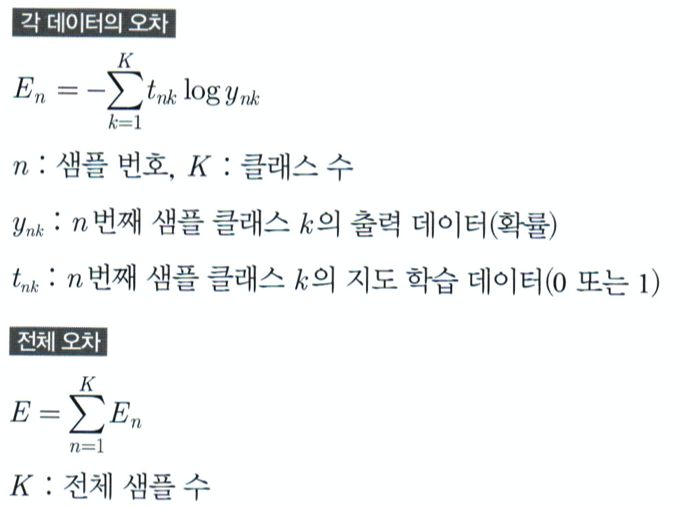

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/edu.kenshi/2021/품질재단/DL/res/크로스엔트로피계산.png')

# -총합( 실제정답*로그(예측값) ) => 이 값이 0에 수렴하도록 최적화 해라

# tnk : 실제 정답
# ynk : 예측값 -> 로그 처리
# 전체 샘플의 tnk*log(ynk) 총합에 -를 붙인값 -> 크로스엔트로피 손실함수식

In [ ]:
# 손실함수 구현
layer_name = 'loss'
with tf.name_scope( layer_name ) as scope:
  # 실제정답 => y_
  # 예측값 => 입력 x가 네트워트 타고 수렴된 y_conv 
  cross_entropy = -tf.reduce_sum( y_ * tf.log( y_conv )  )

# 1개의 값이 나온다
# 이 값은 0에 가깝게(오차가 적다. 예측한 값이 정답에 근접했다)
# 0에 가깝게 나오도록 W,b를 미세조정한다 -> 최적화 도구
cross_entropy

<tf.Tensor 'loss/Neg:0' shape=() dtype=float32>

#### 최적화 - 가중치/편향

- **학습 계수 (W, b)를 조정하는 알고리즘**
- 알고리즘 
  - 경사 하강법(SGD), Adam, AdaGrdi, FMSProp, Momentum,...
- 목적
  - 손실값(지표, 판단의 기준)을 최소로 나오겠금(0에 가깝게 수렴), 네트워크 상에 존재하는 수많은 W, b를 미세 조정한다
  - 최적화 한다

In [ ]:
layer_name = 'adam'
with tf.name_scope( layer_name ) as scope:
  # 1. 최적화 도구를 구한다
  optimzer = tf.train.AdamOptimizer()
  # 2. 최적화 도구가 평가지표(크로스엔트로피)를 최소화 하도록 연산(미세조정)
  train    = optimzer.minimize( cross_entropy )

optimzer, train

(<tensorflow.python.training.adam.AdamOptimizer at 0x7f8c27d94910>,
 <tf.Operation 'adam/Adam' type=NoOp>)

#### 역전파

- 케라스에서 사용할것이다
- 순전파
  - x -> y
- 역전파
  - y -> x
  - 거슬러 올라간다
  - 중간 중간 장애물, 벽을 만났수도 있다
  - W,b를 조정해서 결국에서 x에 도착해야 한다 -> 최적화

#### 예측 및 평가

- 실제적으로 예측 수행
- 평가도 수행
- 정확도 계산
- 손실함수 값 확인

In [ ]:
# 이름공간의 이름  predict
layer_name = 'predict'
with tf.name_scope( layer_name ) as scope:
  # 예측 True, False
  # 예측값, 실제값(정답) => (?, 10)
  # 예측값은 0일 확률, 1일확률, 2일 확률,.... 9일확률 => 총합 1.0 => softmax
  # 입력 x에 대해 예측값 => 1로 예측 : [ 0.1, 0.7, 0.01, 0.02, ... ,0.02 ]
  # 0.7이 가장 높다 => 1로 예측한 값이 70%이다 -> x는 1이다라고 예측한다

  # 비교 대상들 중에서 가장 높은값을 가진 요소의 인덱스를 구한다 -> argmax()

  # 실제 정답 => [ 0, 0, 0, 1, 0 , .. 0  ] -> one-hot 인코딩으로 구성되어있다

  # 만약 55000개의 데이터를 넣어서 예측했다면 
  # 예측결과 55000개와 실제 정답 55000개가 비교해서 predict가 구성된다
  # ?개인데  True or False로 값이 구성됨
  predict  = tf.equal( tf.argmax( y_conv, 1 ) , tf.argmax( y_, 1 ) )
  # tf.cast => True=>1, False=>0
  # 정확도
  accuracy = tf.reduce_mean( tf.cast( predict, tf.float32 ) )

accuracy

<tf.Tensor 'predict/Mean:0' shape=() dtype=float32>

## Part2

### 학습 및 테스트

- 실제로 학습한다
  - 종류
    - 오프라인 학습
      - 시스템 셧다운후 모델 갱신
    - 온라인 학습
      - 실시간으로 모델이 갱신
  - 데이터량
    - 배치 학습 (전체 데이터를 한번에 학습)
      - GPU  메모리에 영향을 받는다
    - 미니 배치 학습
      - 전체 데이터를 쪼개서 여러번에 걸쳐서 학습 진행 -> 리소스 제한때문에 수행하는 방식
  - 방식
    - 전이학습
      - 기존에 잘 만들어진 모델을 가져와서, 특정 데이터에 적합하겠금 W,b가 세팅이 되어 있다 -> 초기화 하여서 새로운 데이터르넣어서 학습 -> 운이 좋다면 바로 좋은 성과를 낼수 있다 (초기에 프로토타입에 사용) -> 파인 튜닝을 통해서 개선하여 마무리

- 실제로 데이터를 주입한다
  - tf.placeholder
  - shape

In [ ]:
# 데이터 주입시 필요한 형태
def make_Feed_Dict( x_data, labels, prob ):
  '''
    - x_data : x, 원본 데이터 
    - prob   : keep_prob, 학습 방해 비율
    - y_     : labels, 실제 정답
    # { 변수명:실데이터 , .... }
    # 변수명 틀리면 않됨 (tf.placeholder로 생성된)
  '''  
  return {
      x:x_data,
      y_:labels,
      keep_prob:prob
  }

In [ ]:
# 학습 (GPU)
import time
start_time = time.time()
loss_logs = list()

# GPU 학습
with tf.device('/device:GPU:0'):
  with tf.Session() as sess:
    TRAIN_COUNT  = 3000
    BATCH_SIZE   = 50    
    VERBOSE_TERM = 100
    sess.run( tf.global_variables_initializer() )  
    # 테스트 데이터의 학습 방해 비율을 1.0 => 학습 자체수행않됨
    test_fd = make_Feed_Dict( mnist.test.images,  mnist.test.labels, 1.0 )
    for step in range( TRAIN_COUNT ):
      batch = mnist.train.next_batch( BATCH_SIZE )        
      train_fd = make_Feed_Dict( batch[0], batch[1], 0.1 )
      # 정확도를 훈련시 추출
      acc, _, loss_log = sess.run( [accuracy, train, cross_entropy] , feed_dict=train_fd )
      # _, loss_log = sess.run( [train, cross_entropy] , feed_dict=train_fd )
      loss_logs.append( loss_log )
      if step % VERBOSE_TERM == 0:      
        acc = sess.run( accuracy, feed_dict=test_fd )
        print( f'step={step:4} acc={acc:20}  loss={loss_log:20}' )          
      
    acc = sess.run( accuracy, feed_dict=test_fd )
    print( f'step={step:4} acc={acc:20}  loss={loss_log:20}' )
    pass

train_time = time.time() - start_time
print( '최종 수행 시간',  train_time)

step=   0 acc=  0.1096000000834465  loss=  1186.7266845703125
step= 100 acc=  0.8628000020980835  loss=   60.17163848876953
step= 200 acc=  0.9272000193595886  loss=   40.34544372558594
step= 300 acc=  0.9480000138282776  loss=  10.201687812805176
step= 400 acc=  0.9559000134468079  loss=   20.22876739501953
step= 500 acc=  0.9627000093460083  loss=   5.821084022521973
step= 600 acc=  0.9629999995231628  loss=  21.803117752075195
step= 700 acc=  0.9677000045776367  loss=  13.245258331298828
step= 800 acc=  0.9690999984741211  loss=  12.151744842529297
step= 900 acc=  0.9735000133514404  loss=   8.090959548950195
step=1000 acc=   0.975600004196167  loss=   8.643366813659668
step=1100 acc=  0.9764000177383423  loss=  13.993749618530273
step=1200 acc=  0.9776999950408936  loss=   12.05276107788086
step=1300 acc=  0.9764000177383423  loss=   2.353757858276367
step=1400 acc=  0.9769999980926514  loss=   23.87452507019043
step=1500 acc=  0.9794999957084656  loss=   8.796468734741211
step=160

In [ ]:
# 자동 실행을 임의로 중단시키기 위해서 예외 코드를 삽입
1/0

ZeroDivisionError: ignored

In [ ]:
# 학습 (CPU -> GPU 전환)

# 시간측정용 => GPU 대비 경과 시간 체크
import time
# 시작 시간
start_time = time.time()
# 손실값 수집
loss_logs = list()

# 학습 => 세션 오픈 => 데이터 주입 => 수행(C++) => 결과 돌려받고 => 세션 닫기 
with tf.Session() as sess:
  # 1. 학습에 필요한 환경변수(상수) 설정
  TRAIN_COUNT = 3000 # 훈련 횟수 설정 => 전체 데이터를 풀로 한번다 사용한다 -> 1 epoch (이 개념 무시)
  BATCH_SIZE  = 50   # 1회 학습시 50개의 데이터를 사용하겟다 
    # 훈련이 모두 종료되면 데이터는 3000*50 = 150000개 데이터를 사용 -> 전체 데이터량은 넘지만 에포크 표현을 못함
    # GPU  학습이 얼마나 빠른 시간 단축 효과를 내는지 확인 하기 위해서 임의 구성
    # 원래 1 에포크 기준으로 배치사이즈 설정 => 몇 에포크 학습할것인지 설계
    # ex) 100 epoch 사용할것이다 => 전체 데이터를 풀로 학습에 사용하는 횟수를 총 100회 수행
    #     1 epoch 학습시 (1 세대 구현시) batch_size 를 설계 전체 데이터 55000/50 => 이게 1세대상의 학습 반복수
  VERBOSE_TERM = 100 # 학습 회수가 100단위를 통고하면 테스트 데이터를 주입하여서 점검(손실값, 정확도)->로그

  # 2. 텐서플로우 전역 변수 초기화 (내부적인 변수 초기화)
  sess.run( tf.global_variables_initializer() )

  # 3. 테스트/검증시 주입할 데이터를 준비(이부분의 순서는 상관없다)
    # dict 형태로 구성, 변수명:데이터(shape이 일치해야 한다)
    # 테스트 데이터 10000개를 한번에 넣어서 테스트 할것이다 -> 구성에 변화가 없다 -> 1번만 생성
    # 테스트 데이터 => 일종의 테스트과정 => 학습 방해비율을 0으로 처리하겟다
  test_fd = make_Feed_Dict( mnist.test.images,  mnist.test.labels, 1.0 )

  # 4. 학습(훈련) : 여기서는 원시적인 느낌으로(for) 구현
  for step in range( TRAIN_COUNT ): # 0 ~ 2999 => 3000번
    # 4-1. 미니배치학습=>학습 1회시 필요한 데이터 추출(랜덤,셔플)
      # 위에 설정에 의해서 1회 학습시 50개의 데이터를 사용 -> 셔플을 통해서 램덤하게 획득(중복가능)
      # mnist.train.next_batch() => ( 데이터, 정답 )
    batch = mnist.train.next_batch( BATCH_SIZE )
    
    # 4-2. 학습(훈련) 1회시 사용한 데이터 준비
      # 10% 비율로 학습을 방해하는 구조로 학습을 진행하겟다 => dropout에 적용
    train_fd = make_Feed_Dict( batch[0], batch[1], 0.1 )

    # 4-3. 데이터플로우그래프(train, ..(필요시추가->손실함수)) 학습(훈련) 진행, 데이터를 주입
      # sess.run( [ 수행할 그래프, 중간에 확인할 그래프,... ] )
      # 넣은 개수만큼 리턴
    acc, _, loss_log = sess.run( [accuracy, train, cross_entropy] , feed_dict=train_fd )
    loss_logs.append( loss_log )

    # 4-4. 훈련의 결과로 손실함수값 리턴 (이것을 모아서 시각화를 하면, 손실값이 늘고 있는지 줄고 있는지 확인)
    # 4-5. 실제 훈련하고 있는지, 성과과 있는지 중간 점검 => 로그 출력(테스트 데이터를 주입)
    if step % VERBOSE_TERM == 0:
      # 향후에 진행시에는 이 테스트 수행시 학습에 영향을 미치지 않도록 lock을 걸어야 한다
      # 토치에서 확인해 보겟다. 현재는 영향을 미친다
      acc = sess.run( accuracy, feed_dict=test_fd )
      print( f'step={step:4} acc={acc:20}  loss={loss_log:20}' )
      pass
    pass
  
  # 5. 학습 마감 => 최종 결과 : 손실, 정확도 확인
  #    현재 방식은 가장 마지막에 훈련된 모델을 가장 좋다고 보고 최종 결과로 사용하겟다
  #    중간이라도 가장 좋게(best) 나온 모델(손실값이 0에 가장 가까운)을 덤프해서 관리: 정석
  acc = sess.run( accuracy, feed_dict=test_fd )
  print( f'step={step:4} acc={acc:20}  loss={loss_log:20}' )
  pass


# 종료 시간
train_time = time.time() - start_time
print( '최종 수행 시간',  train_time)

In [ ]:
loss_logs

# 시스템 통합

- 케라스에서 시스템 통합을 구현
- flask에서 처리
- 딥러닝으로 만든 모델을 서비스에서 어떻게 활용하는지 확인